<a href="https://colab.research.google.com/github/Bansalnitika21/Geeksman_AISquad_Project1_NITIKA/blob/devil/predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTING THE DIFFERENCE BETWEEN AN IMAGE OF ORGANIC OR RECYCLABLE WASTE**

###**LINK OF GOOGLE DRIVE CONTAINING .PTH .PKL FILE PPT AND WORD FILE**

In [1]:
https://drive.google.com/drive/folders/1-AhH6lOhdDfJ5Wh-L7ET8MbnuteFBjb_?usp=sharing

SyntaxError: ignored

### **IMPORTING LIBRARIES**

RELOAD

MATPLOTLIB

FASTAI

WARNINGS

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

###**PREDICTION FUNCTION**

WE HAVE USED THIS COMMAND LIKE THIS BECAUSE THE SIZE OF EXPORT.PKL FILE IS MORE THAN 98M, AND THE PREVIOUS METHOD WAS GIVING ERROR. BUT NOW THE LINK IS EASILY ACCESSIBLE.

In [3]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1--_PnjrkTkpGIUDTATk6M_vIAA3YdPrA' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1--_PnjrkTkpGIUDTATk6M_vIAA3YdPrA" -O "export.pkl" && rm -rf /tmp/cookies.txt

--2020-08-24 14:00:52--  https://docs.google.com/uc?export=download&confirm=aXNU&id=1--_PnjrkTkpGIUDTATk6M_vIAA3YdPrA
Resolving docs.google.com (docs.google.com)... 74.125.24.138, 74.125.24.100, 74.125.24.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.24.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-84-docs.googleusercontent.com/docs/securesc/7fkm7s7hp2mnfv3mqkrg4qoot1c192pj/o6uaq97i4m428m8aoqt7bef57uh8qksb/1598277600000/03717844267886357067/08238945924603596611Z/1--_PnjrkTkpGIUDTATk6M_vIAA3YdPrA?e=download [following]
--2020-08-24 14:00:53--  https://doc-0c-84-docs.googleusercontent.com/docs/securesc/7fkm7s7hp2mnfv3mqkrg4qoot1c192pj/o6uaq97i4m428m8aoqt7bef57uh8qksb/1598277600000/03717844267886357067/08238945924603596611Z/1--_PnjrkTkpGIUDTATk6M_vIAA3YdPrA?e=download
Resolving doc-0c-84-docs.googleusercontent.com (doc-0c-84-docs.googleusercontent.com)... 74.125.200.132, 2404:6800:4003:c00::84
Connecting to 

PREDICTOR FUNCTION WILL USE THE EXPORT.PKL FILE PRESENT AT CONTENT LOCATION.

In [4]:
predictor = load_learner('/content/')

DEFINING MY_PREDICTOR

In [5]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

###**DATASET**

UPLOADING KAGGLE.JSON FILE

In [6]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


IMPORTING OS, PANDAS AND SETTING THE ENVIRONMENT VARIABLE

In [7]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

###**.ZIP FILE**

THIS WILL DOWNLOAD A .ZIP FILE AT CONTENT LOCATION

In [8]:
!kaggle datasets download -d bansalnitika21/dataset

 97% 425M/437M [00:21<00:00, 20.5MB/s]
100% 437M/437M [00:21<00:00, 21.7MB/s]


THIS WILL UNZIP THE .ZIP FILE, DOWNLOADED USING API COMMAND



In [9]:
!unzip -o /content/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: waste-classification-data/dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: waste-classification-data/d

###**SETTING LOCATION OF IMAGES**

YOU CAN REPLACE **R** WITH **O** SO THAT YOU CAN ACCESS ORGANIC AND RECYCLABLE FOLDERS

OS.LISTDIR IS USED TO SHOW THAT THERE ARE TWO FOLDER AT LOCATION TEST

In [10]:
all_test_images=os.listdir("/content/waste-classification-data/DATASET/TEST/O/")
os.listdir("/content/waste-classification-data/DATASET/TEST/")

['R', 'O']

YOU CAN CHANGE THE VALUE OF IDX TO 1 TO ACCESS THE ORGANIC **O** FOLDER 

USIND IDX AS 0 YOU WILL GET ALL THE IMAGES FROM RECYCLABLE **R** FOLDER

O


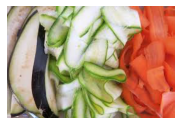

In [11]:
idx=1
print(my_predictor("/content/waste-classification-data/DATASET/TEST/O/"+all_test_images[idx]))
img = open_image("/content/waste-classification-data/DATASET/TEST/O/"+all_test_images[idx])
img.show()

FOR ACCESSING R FOLDER

R


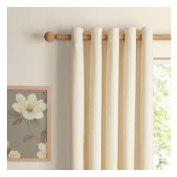

In [12]:
all_test_images=os.listdir("/content/waste-classification-data/DATASET/TEST/R/")
idx=0
print(my_predictor("/content/waste-classification-data/DATASET/TEST/R/"+all_test_images[idx]))
img = open_image("/content/waste-classification-data/DATASET/TEST/R/"+all_test_images[idx])
img.show()

### **CREATING FOLDER AND STORING IMAGES**

Making test_data folder

In [19]:
os.makedirs('test_data')

Selecting random 60 pictures from O folder 

In [28]:
path = '/content/waste-classification-data/DATASET/TEST/O/'
all_test_images=os.listdir(path)
for i in range(60):
  path1 = path+all_test_images[i]
  shutil.copy(path1, '/content/test_data')

Selecting random 60 pictures from R folder and using shutil to copy these images into test_data folder.

In [21]:
path = '/content/waste-classification-data/DATASET/TEST/R/'
all_test_images=os.listdir(path)
for i in range(60):
  path1 = path+all_test_images[i]
  shutil.copy(path1, '/content/test_data')

For selecting random pictures from test_data folder ,shuffling the pictures and creating another folder test_result to see if our model could guess the waste right!!

In [22]:
import cv2
import random
test_files=os.listdir("/content/test_data")
random.shuffle(test_files)
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("/content/test_data/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 2
  color = (255, 0, 0) 
  thickness = 4
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

###**CREATING VIDEO**

THIS CELL WILL CREATE A MY_FINAL_OUTPUTR OR MY_FINAL_OUTPUTO FILE AT CONTENT LOCATION

**NOTE**: YOU HAVE TO CHANGE **R** TO **O** AND TEST_RESULT1 TO TEST_RESULT

In [23]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv422p ../my_final_output.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable

### **KORA**

INSTALLING KORA IN COLAB

AND IMPORTING UPLOAD_PUBLIC TO GENERATE A PUBLIC LINK OF THE VIDEO GENERATED

In [24]:
!pip install -U kora
from kora.drive import upload_public


DEFINNING URL!!

In [25]:
url = upload_public('my_final_output.mp4')

This cell will display the created video in colab notebook!!

In [26]:
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

YOU CAN COPY THIS LINK CREATED AND PASTE ANYWHERE AND THE VIDEO WILL BE VISIBLE AND WORKING!!!!!

In [27]:
url

'https://drive.google.com/uc?id=1N3NcB93rNO4TA3M3rdmK6ki-U0V2x7i2'